In [14]:


import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearnex import patch_sklearn

patch_sklearn()
from drowsiness_detection.visualize import plot_roc_over_sessions, plot_roc_over_subjects, plot_roc_over_n_folds
import pickle
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv  # noqa
# now you can import normally from model_selection
from sklearn.model_selection import train_test_split
from drowsiness_detection.data import (get_feature_data, preprocess_feature_data,
                                       session_type_mapping)
from drowsiness_detection import config
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.metrics import RocCurveDisplay

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# fixed experiment params
seed = 123
test_size = .2
num_targets = 2
exclude_by = 'a'

ValueError: Expected 'estimator' to be a binary classifier, but got Pipeline fit on multiclass (3 classes) data

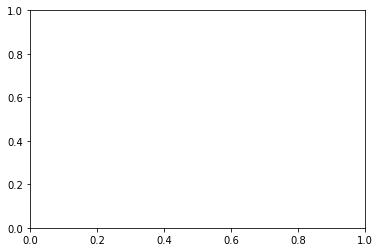

In [21]:
fig, ax = plt.subplots()

for window_size in [10,30,60]:
    config.set_paths(30, window_size)

    # load hyperparameter results
    with open("../logs/19/best_model.pkl", "rb") as fp:
        best_estimator = pickle.load(fp)

    # load data
    data = get_feature_data(data_path=config.PATHS.WINDOW_FEATURES)
    X, y = preprocess_feature_data(feature_data=data,
                                   exclude_sess_type=session_type_mapping[exclude_by],
                                   num_targets=num_targets)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=seed)

    RocCurveDisplay.from_estimator(estimator=best_estimator, X=X_test, y=y_test, name="RF-60s", ax=ax)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__n_estimators,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,342.219069,61.175934,0.75365,0.142029,entropy,35,sqrt,512,"{'classifier__criterion': 'entropy', 'classifi...",0.652189,...,0.999763,0.999802,0.999763,0.999763,0.999763,0.999802,0.999802,0.999802,0.99979,0.000025
